<a href="https://colab.research.google.com/github/kevieilish/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### <b> Importing Dataset, Libraies, ML Models and Evaluation metrics.

In [1]:
# import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
%matplotlib inline
# import warning 
import warnings
warnings.filterwarnings('ignore')
# import evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#import datetime library t wrok with datetime values
from datetime import datetime
import datetime as dt

# import  gridsearchcv , and randomsearCV for hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
#import other important libraries 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# import ML models 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor #linear , ridge , lasso and SGD regressor
from sklearn.preprocessing import PolynomialFeatures # for polynomial regression
from sklearn.tree import DecisionTreeRegressor # for decision tree regressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor # ensemble models
from sklearn.datasets import make_regression

In [2]:
# mount your drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the dataset 

data = pd.read_csv('/content/SeoulBikeData.csv', encoding = ('ISO-8859-1'))

In [5]:
# coping the dataset in a variabe "df"
df=data.copy()

In [6]:
# checking column name of our dataframe columns 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# renaming columns

df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [8]:
# printing our new column name as we have changed it for better understanding
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### <b> Exploring and Understanding our Data </b>

In [9]:
# priting our dataset
df

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
# shape of dataset: To see the number of rows and columns 
df.shape

(8760, 14)

In [11]:
# to check some basic info of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [12]:
# to check descriptive summary of our dataset (especially  numerical columns)
df.describe(include="all")

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [13]:
# to transpose data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## **Preprocessing the data**

### Checking null values and treating 
Handling missing values is very important as it can cause a lot of trouble for us during analsyis and model building .

In [14]:
# checking the null value in each column of datasets
df.isna().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [15]:
# check no. of unique values in each columns 
df.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

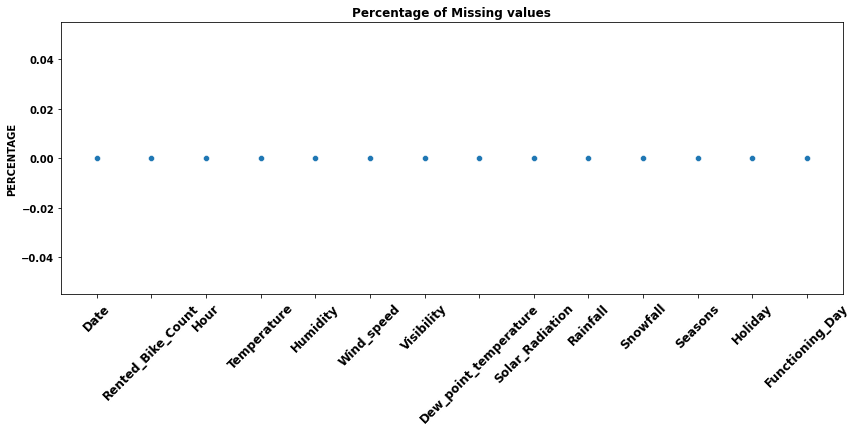

In [16]:
# plot the scatterplot to show missing values 

missing_values = pd.DataFrame((df.isna().sum()) * 100 / df.shape[0]).reset_index( )
plt.figure(figsize = (14,5))
ax = sns.scatterplot(df.columns , 0) 
plt.xticks(rotation =45,fontsize =12,Weight='bold')
plt.yticks(fontsize =10,Weight='bold')
plt.title("Percentage of Missing values",Weight='bold')
plt.ylabel("PERCENTAGE",Weight='bold')
plt.show()

we don't have any null values which is very good thing and we can go ahead in our analysis

## Duplicate values

In [17]:
# to know about duplicate data in our datasets 
df[df.duplicated()].shape

(0, 14)

We found no duplicate data record in our dataset. 
Next step would be data preprocessing 

### Correlation between columns

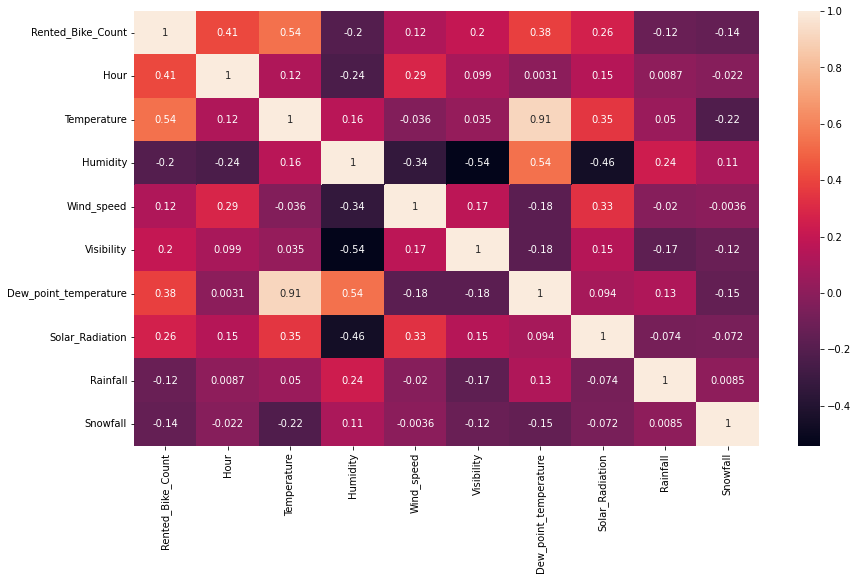

In [18]:
# ploting heat map to determine corelation b/w columns of your datasets
plt.figure(figsize = (14,8))
sns.heatmap(df.corr() , annot = True )

### Treating date-time Columns 

In [19]:
# as date is object dtype, we need to convert it into date type of object
df['Date'] = pd.to_datetime(df['Date']) 

In [20]:
# spliting our date column in date, month and year (DYM) for better understanding
df['day_of_week'] = df['Date'].dt.day_name() # extraxt weekday column from date 
df['month'] = df['Date'].dt.month_name() # extracting month column from date 
df['year'] = df['Date'].dt.year

In [21]:
# now we need to covert year column into categorical column for better analytical purpose
df['year'] = df['year'].astype('object')

In [22]:
# now see unqiue values in year column
df['year'].unique( )

array([2017, 2018], dtype=object)

In [23]:
# convert hour column into categorical column as even though time is continous column, here it's present like timestamp feature
df['Hour']=df['Hour'].astype('object')

In [24]:
# we can also segregate our day into weekdays and weekend category 
df['weekend_col'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [25]:
# now we can drop day column of date , day(as we have extracted weekend and weekday feature from it and we can also drop year column
# year column have date from dec 2017 and nov 2018 

df= df.drop(columns = ['Date' , 'day_of_week' , 'year'] , axis =1 )

## **Exploratory Data Analysis**



In [26]:
# divide our dataset on the base of categorical and numerical features 
numeric_df = df.select_dtypes(exclude='object')
categorical_df = df.select_dtypes(include='object') 

In [27]:
# numerical Columns
numeric_df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

In [28]:

# categorical Columns
categorical_df.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend_col'],
      dtype='object')

Text(0.5, 1.0, 'Count of Rented bikes acording to Month')

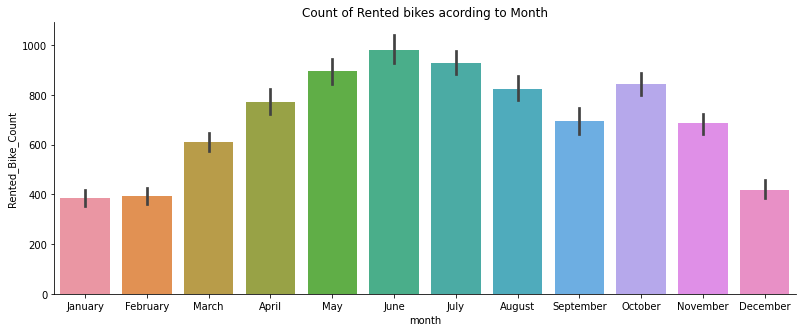

In [29]:
# ploting a catplot to check rental bikes count: Monthly
sns.catplot(x = 'month' , y = 'Rented_Bike_Count' ,kind = 'bar', height= 4.5, aspect = 2.5 , data = df)
plt.title("Count of Rented bikes acording to Month")

From the above bar plot we can clearly say that from the month 5(may) to 10(october) the demand of the rented bike is very high as compare to other months. 
Hence, we can say that bike sharing demand is high is summer season and low in winers. 

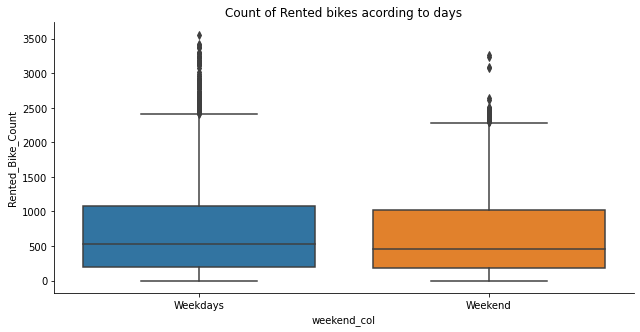

In [30]:
# to check rental bikes count with reference to weekdays & weekends 
sns.catplot( x= 'weekend_col' ,  y = 'Rented_Bike_Count' , data = df , kind = 'box' , height = 4.5, aspect = 2.0 )
plt.title('Count of Rented bikes acording to days')
plt.show()

we observed that demand is high in weekday as compare to weekends. And this can be due to office-going and college-students. 

Text(0.5, 1.0, 'Count of rented bike hourly')

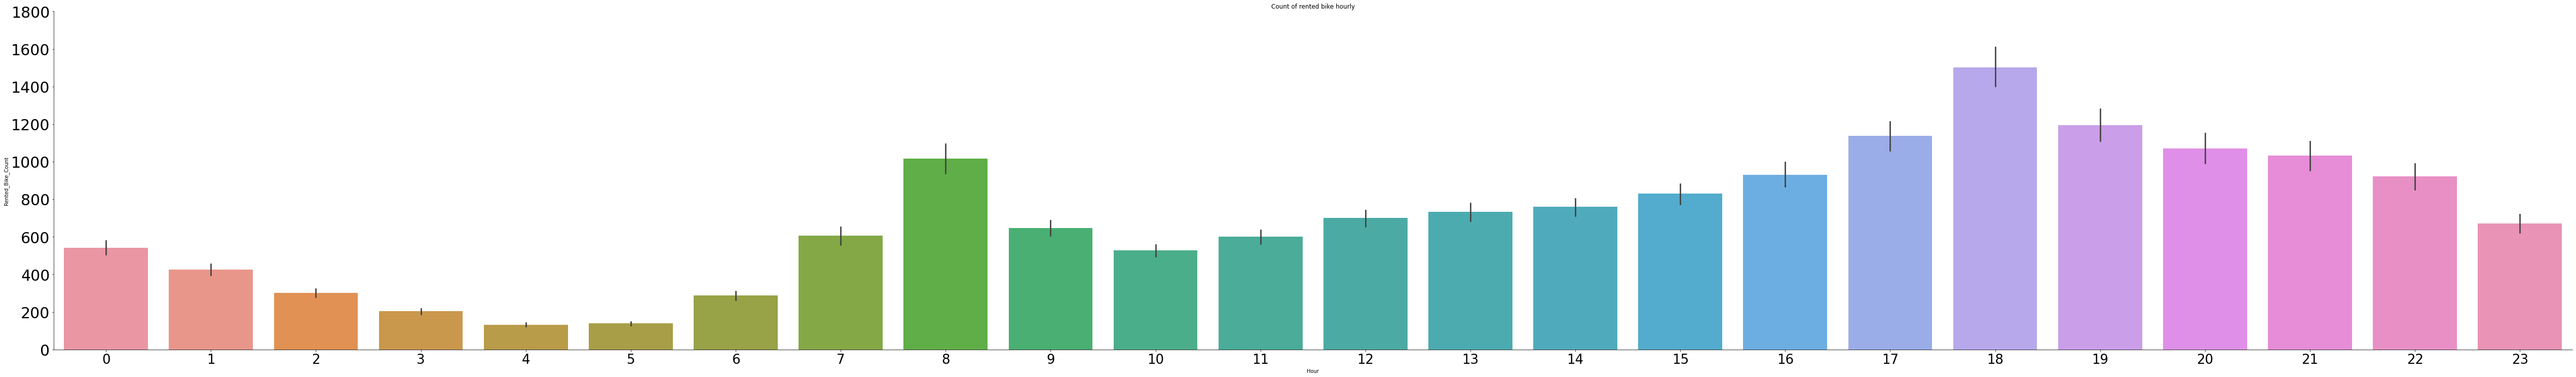

In [31]:
# to check rental bikes count: Hourly 
res = sns.catplot(x= 'Hour' , y= 'Rented_Bike_Count' , data = df , kind= 'bar' , height = 10.0 , aspect = 7.0)
res.set_xticklabels(fontsize = 26)
res.set_yticklabels(fontsize = 30)
plt.title("Count of rented bike hourly")

We observed that bike sharing is low after midnight till morning hours (between 1 am to 6 am) and it's increasing very high in evening hours. It seems people are opting for this when they are coming back from their works (office/college). 
And a lot of people consider going out in evening hours for their shopping, market, restaurants and other places.  

Text(0.5, 1.0, 'Count of rented bike acc to funtional day')

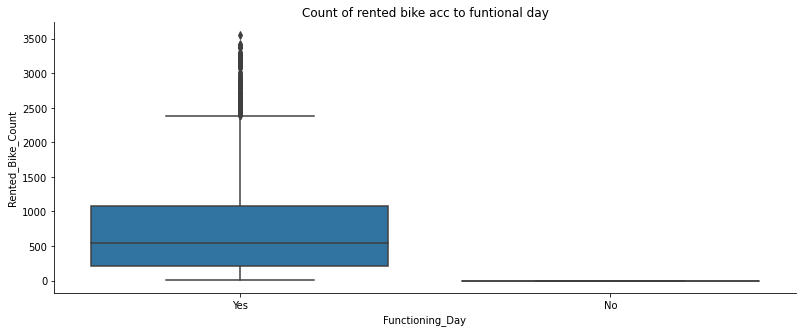

In [32]:
# now on the basis of functional days which include festival or Govt holidays.  
sns.catplot(x = 'Functioning_Day' , y = 'Rented_Bike_Count' , data = df , kind = 'box' , height = 4.5, aspect = 2.5)
plt.title("Count of rented bike acc to funtional day")

Demand is negligible during non-functional day. 

Text(0.5, 1.0, 'count of rented bike acc to holidays ')

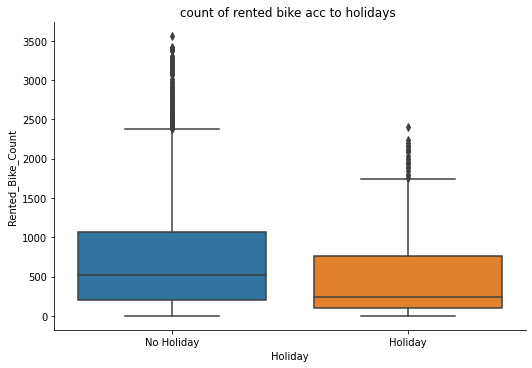

In [33]:
# now by holidays 
sns.catplot(x= 'Holiday' , y = 'Rented_Bike_Count' , data = df , kind = 'box' , height = 5.0 , aspect = 1.5)
plt.title("count of rented bike acc to holidays ")

Rental bike count is high during no-holiday as compare to holidays. 

Text(0.5, 1.0, 'count of rented bike acc to season')

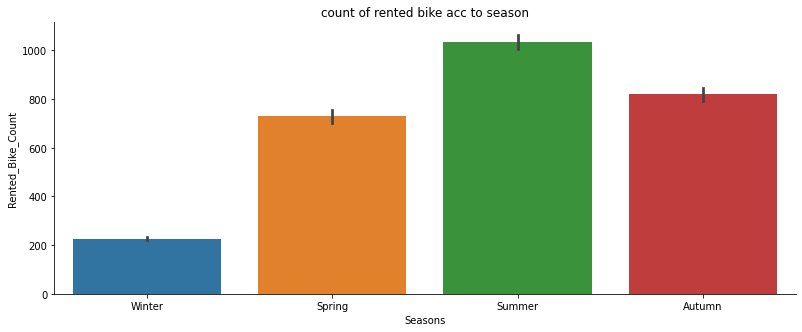

In [34]:
# to check rental bikes count on the basis of season
sns.catplot(x = 'Seasons' , y = 'Rented_Bike_Count' , data = df , kind = 'bar' , height = 4.5 , aspect = 2.5 )
plt.title('count of rented bike acc to season')

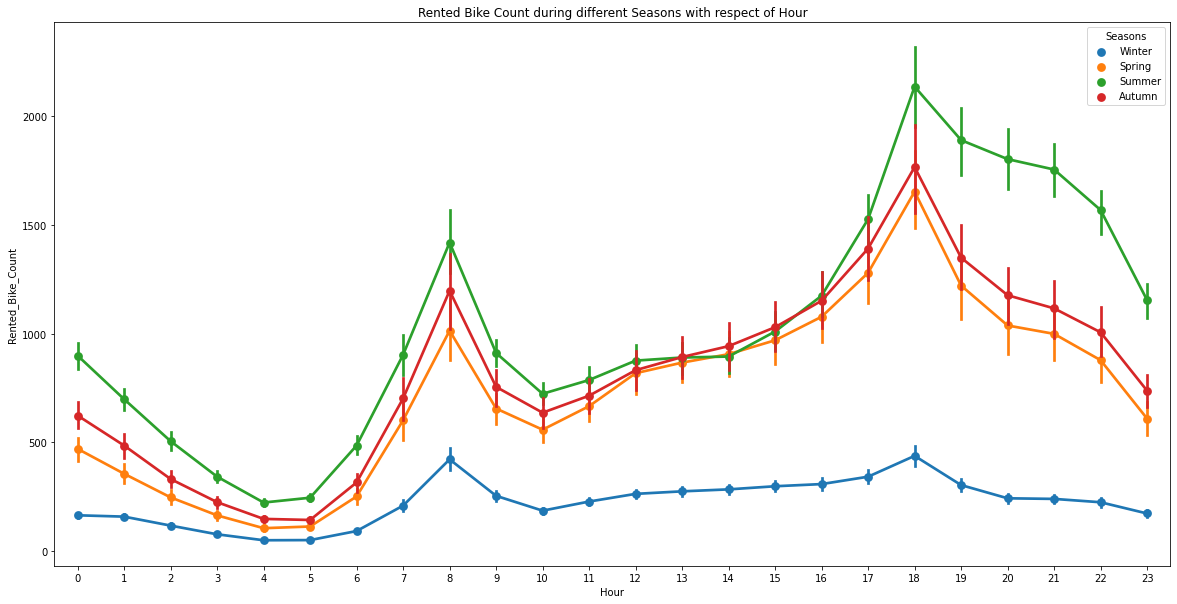

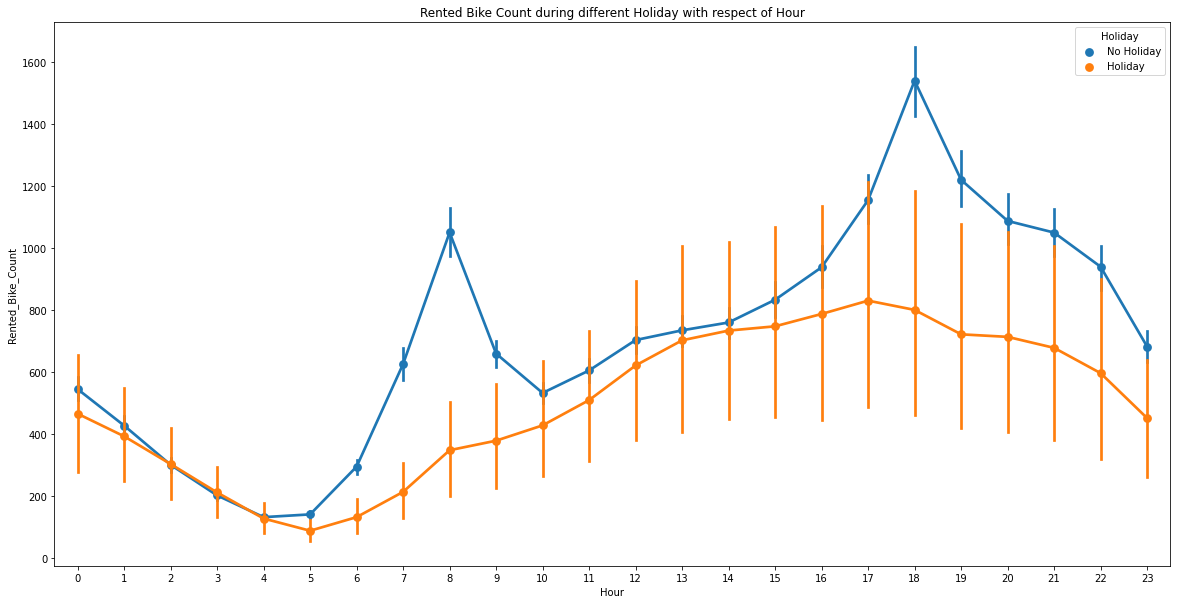

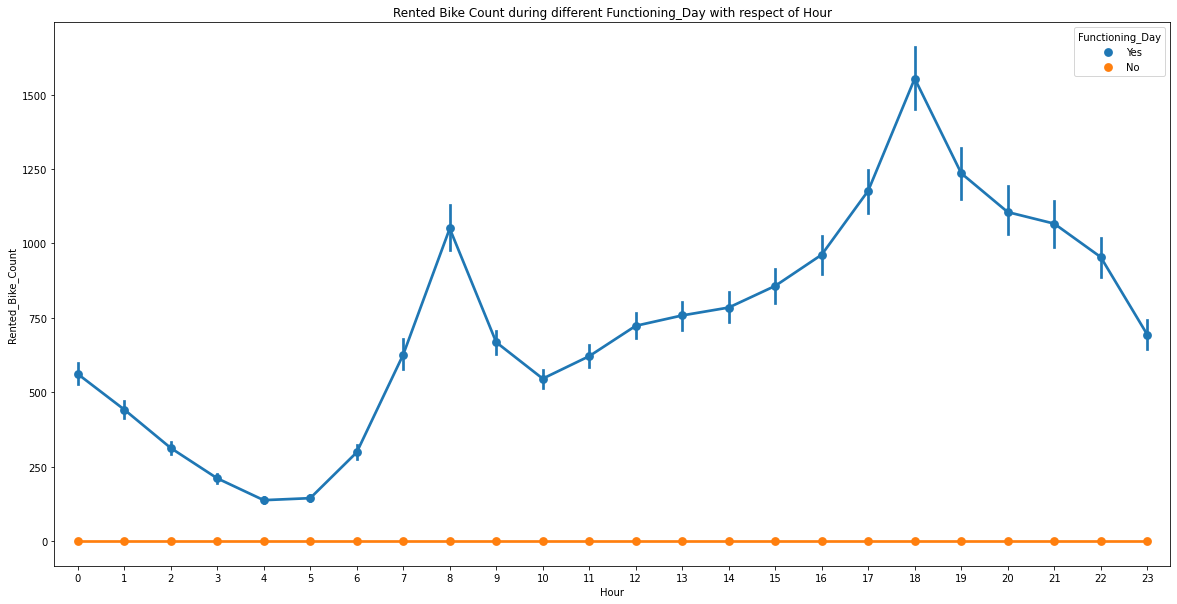

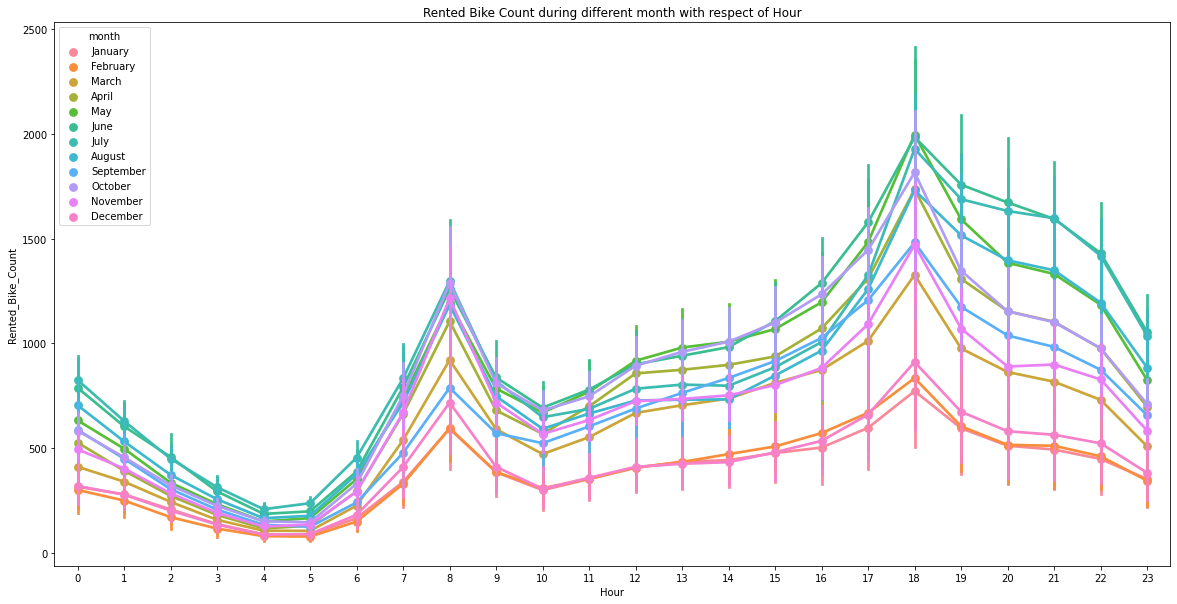

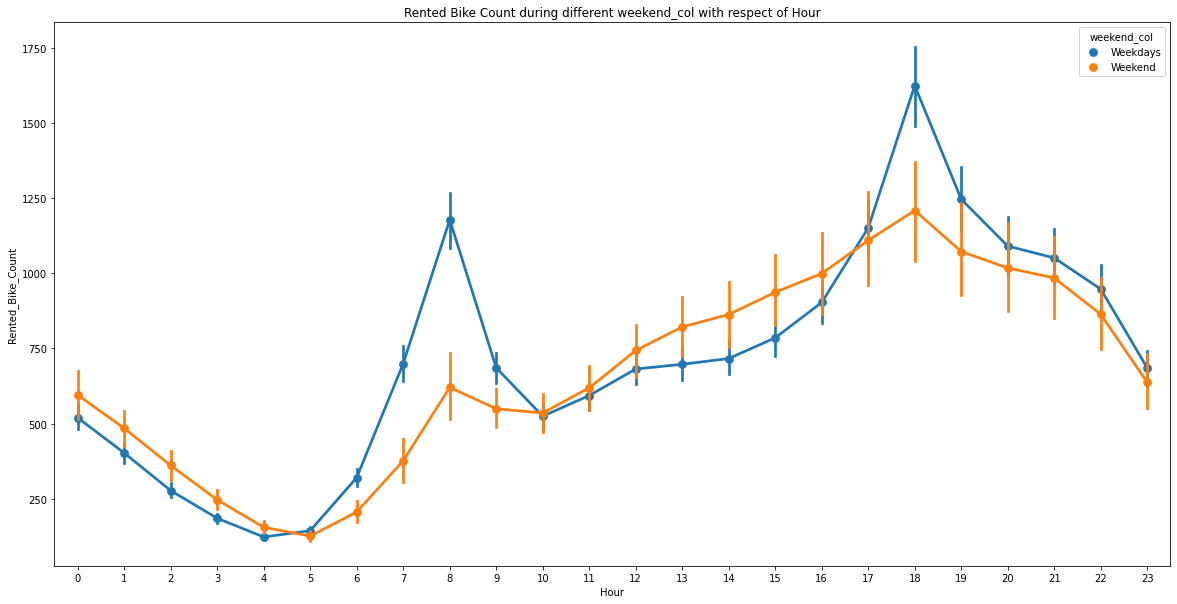

In [35]:
# create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_df.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

### **Focusing on  numerical**

In [36]:
numeric_df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

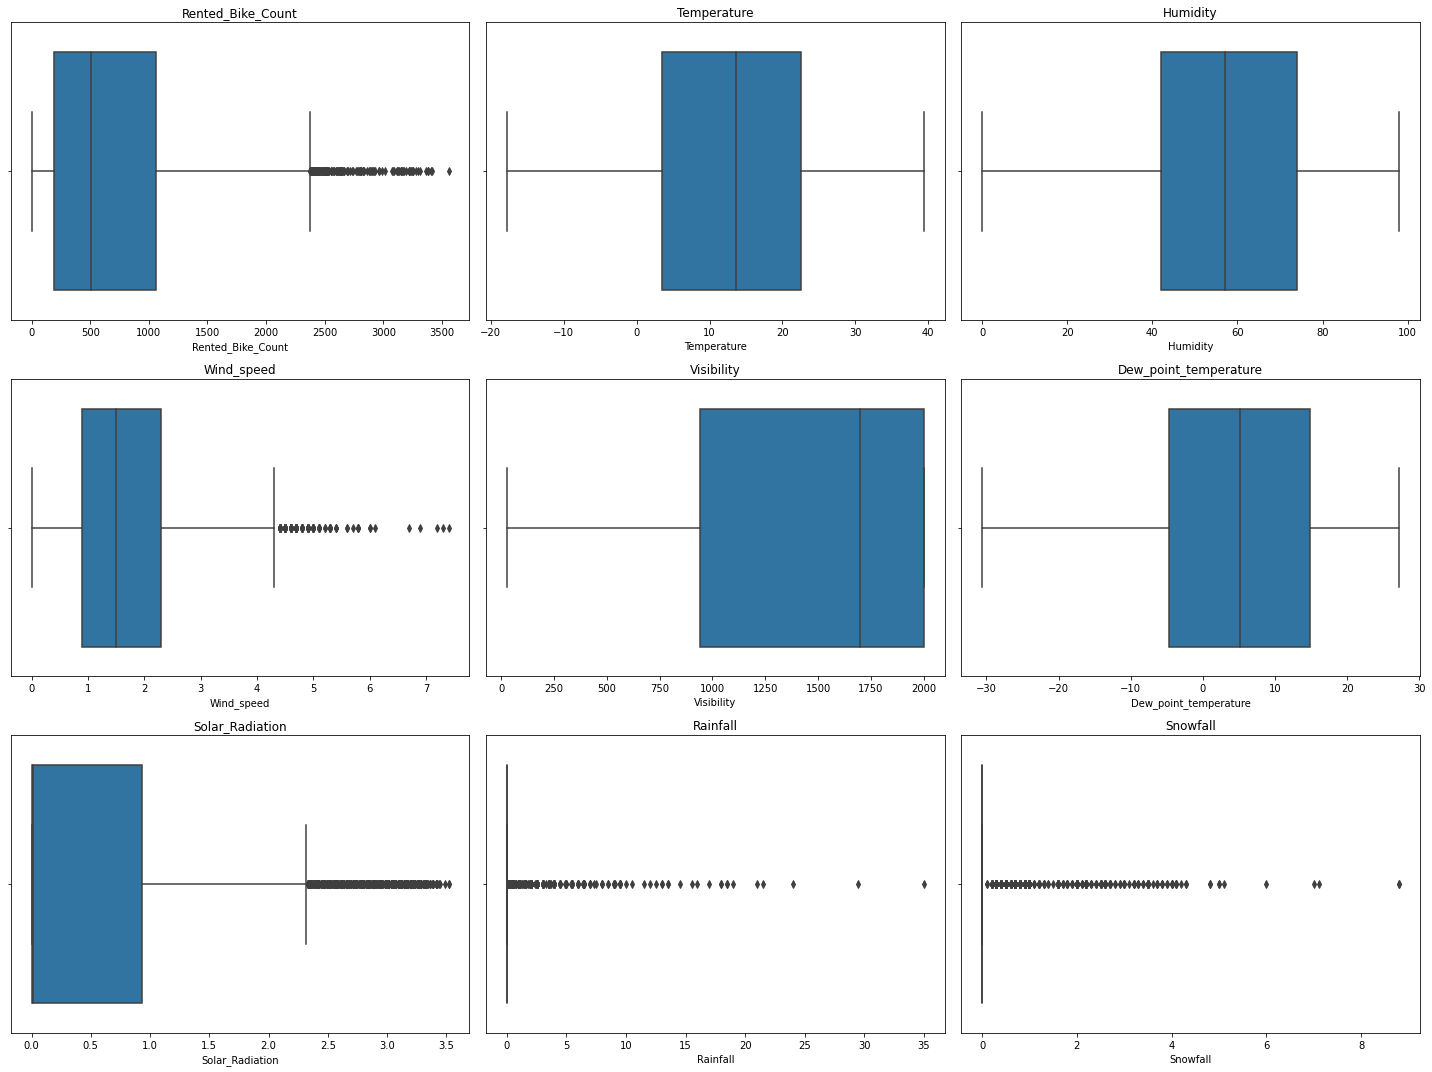

In [37]:
# boxplot to check outliers in numerical columns 
n = 1
plt.figure(figsize=(20,15))

for col in numeric_df.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.tight_layout()

If we'll remove outlier from rainfall and snowfall column. it can impact our results. Hence avoiding them now. 


In [38]:
# take a look at maximum value of each column to get an idea about outlier

print(df['Wind_speed'].max())
print(df['Solar_Radiation'].max())

7.4
3.52


### We need to treat this outlier and we are using caaping for this


In [39]:
# according to upper bound and lower bound for iqr of each column 

df.loc[df['Solar_Radiation']>=2,'Solar_Radiation']= 2
df.loc[df['Wind_speed' ]>=4,'Wind_speed']= 4

In [40]:
# now take a one look at these column max value to look at outlier problem

print(df['Wind_speed'].max())
print(df['Solar_Radiation'].max())

4.0
2.0


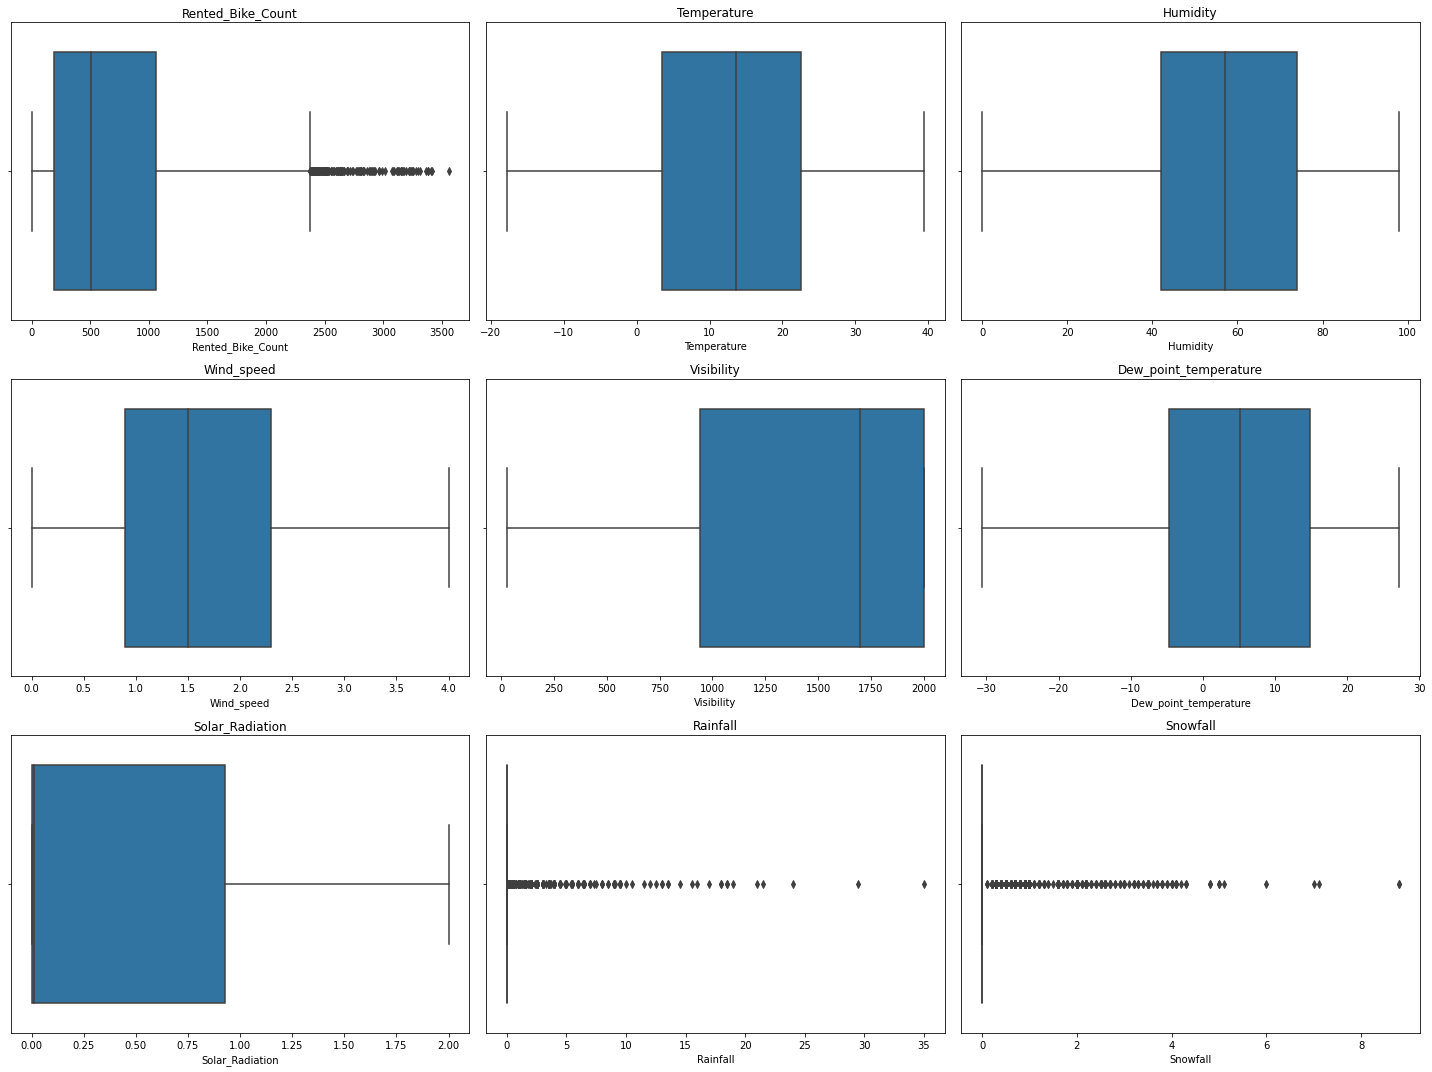

In [41]:
# and again checking outliers again
 
n = 1
plt.figure(figsize=(20,15))

for col in numeric_df.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.tight_layout()

We have treated outlier as per the requirement. 

Now we are moving ahead to find relation b/w our numerical independent column with rented bike column with help of regression plot


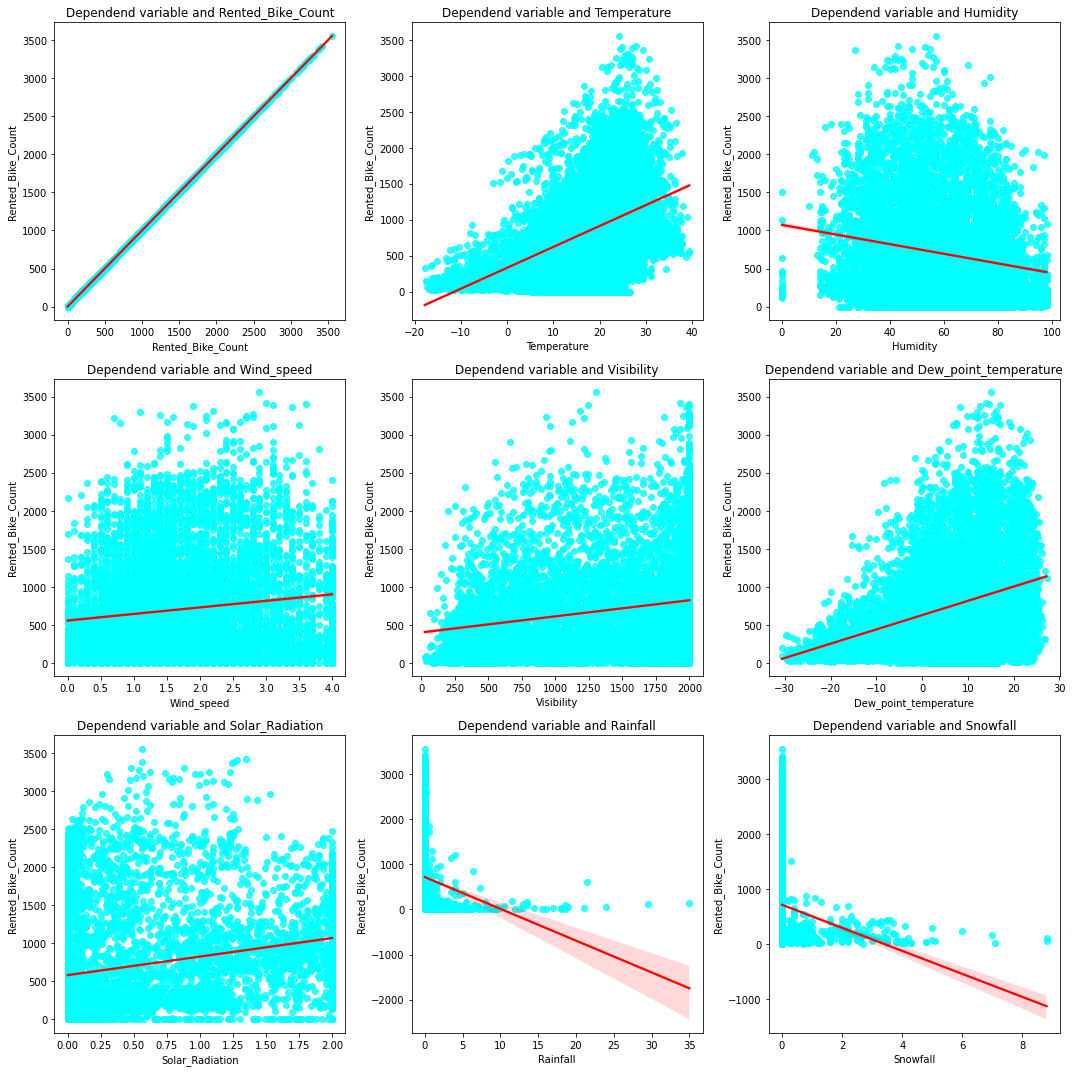

In [42]:
# to know relation with dependent and independent columns
n=1
plt.figure(figsize=(15,15))
for i in numeric_df.columns :
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(3,3,n )
    n += 1
    sns.regplot(df[i], df['Rented_Bike_Count'] , scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

now to prepare our dataset better for model building by studying its distribution and skewness

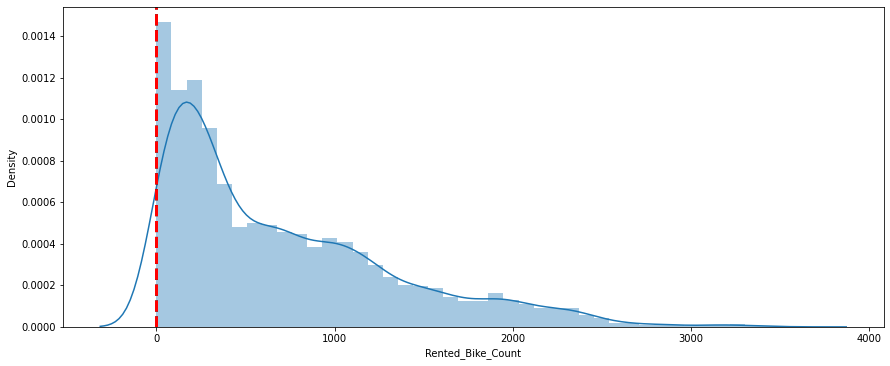

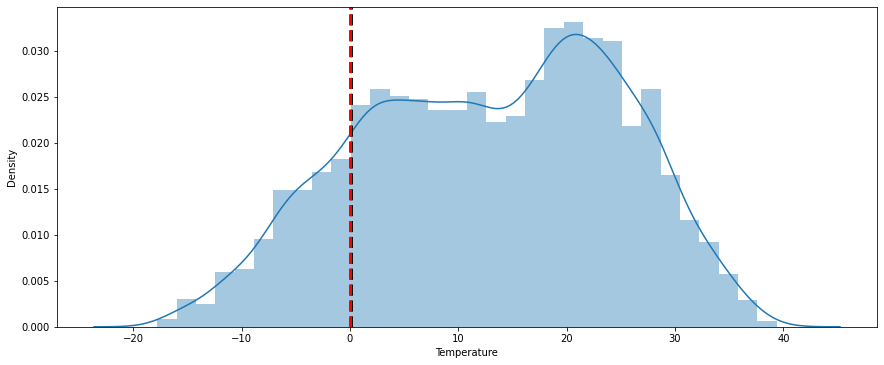

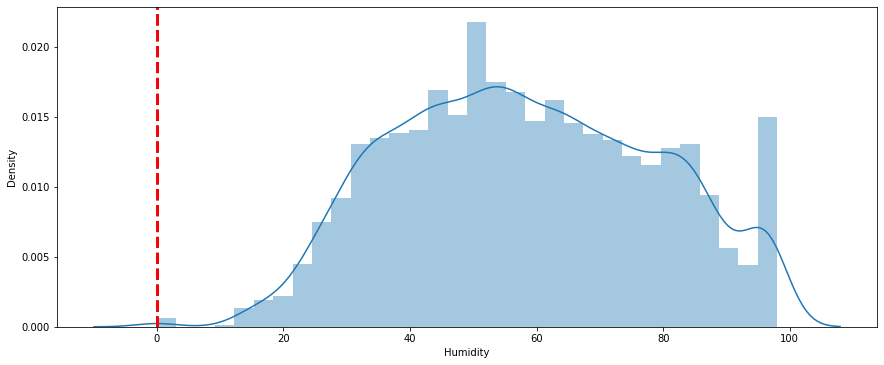

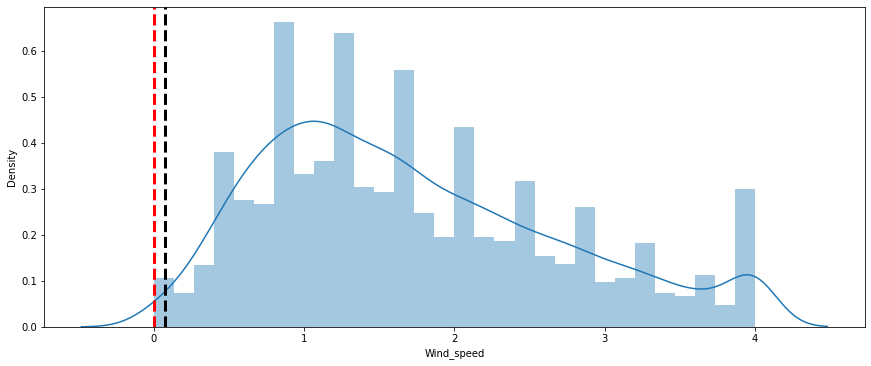

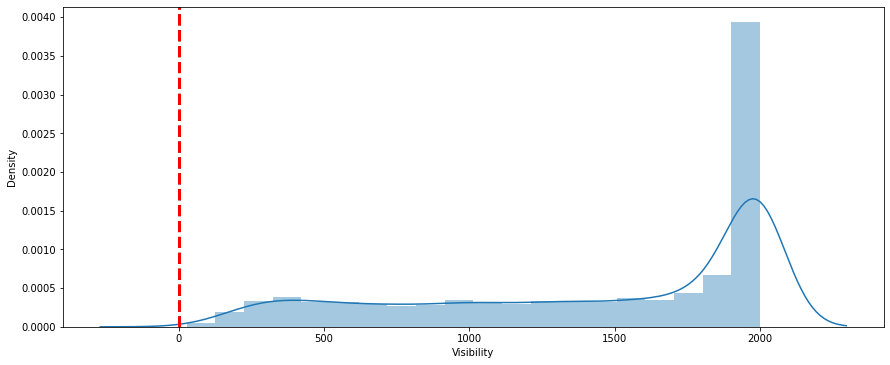

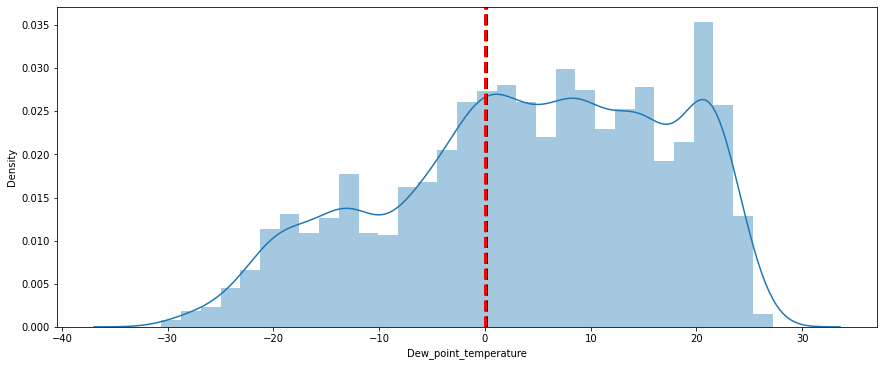

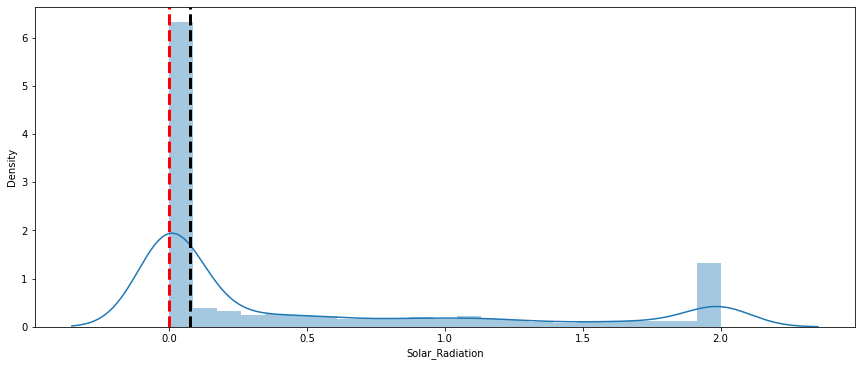

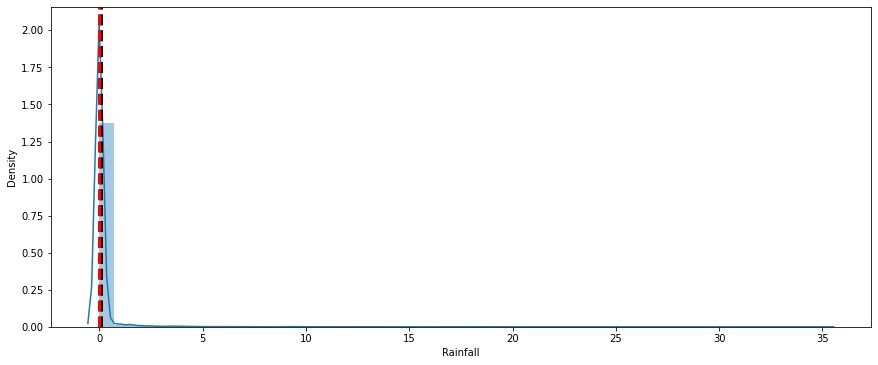

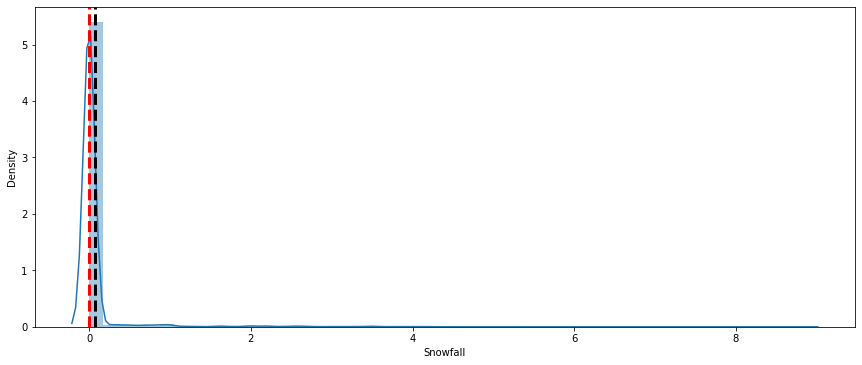

In [43]:
# checking skewness 
n = 1 
for col in numeric_df.columns :
  plt.figure(figsize = (50,20))
  plt.subplot(3,3 ,n ) 
  n += 1 
  sns.distplot(df[col])
  feature = df[i]
  plt.axvline(feature.mean(), color='black', linestyle = 'dashed' , linewidth=3)
  plt.axvline(feature.median(), color='red', linestyle='dashed', linewidth=3)
  plt.show()

We observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

Right skewed columns are Rented Bike Count (Its also our Dependent variable), Wind_speed, Solar_Radiation, Rainfall(mm), Snowfall (cm). 

Left skewed columns are  Visibility (10m), Dew point temperature(°C)

From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed which was understood by looking at the graph that this would happen.


* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to normalize it.***

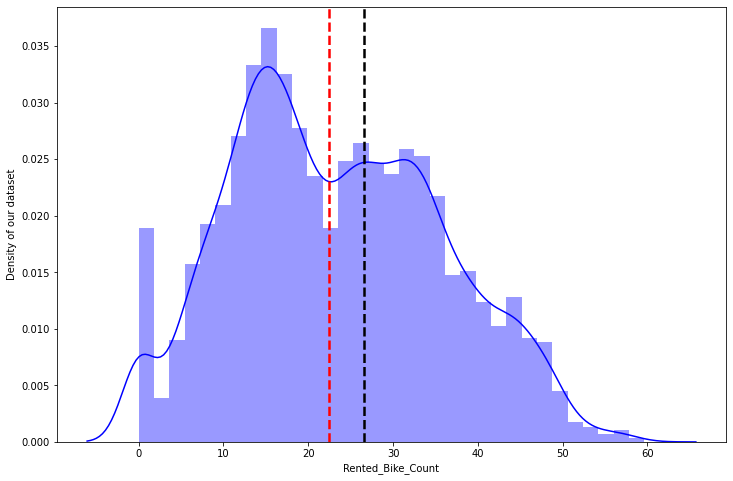

In [44]:
plt.figure(figsize = (12 ,8))
plt.xlabel("Rented  Bike Count")
plt.ylabel("Density of our dataset") 

ax = sns.distplot(np.sqrt(df['Rented_Bike_Count']) , color = "blue")
ax.axvline(np.sqrt(df['Rented_Bike_Count'].mean()) , color = 'black' , linestyle = 'dashed' , linewidth = 2.5)
ax.axvline(np.sqrt(df['Rented_Bike_Count'].median()) , color = 'red' , linestyle = 'dashed' , linewidth = 2.5)




Since we have generic rule of applying Square root for the skewed variable in order to make it normal. After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution

In [45]:
# now corelation b/w the  dependent varaiables with rented bike count
df.corr()['Rented_Bike_Count']

Rented_Bike_Count        1.000000
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.131549
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.272995
Rainfall                -0.123074
Snowfall                -0.141804
Name: Rented_Bike_Count, dtype: float64

We observed smilar things in regression plot also where some feature are negatively correlated and some positively correalted with dependent variable. 

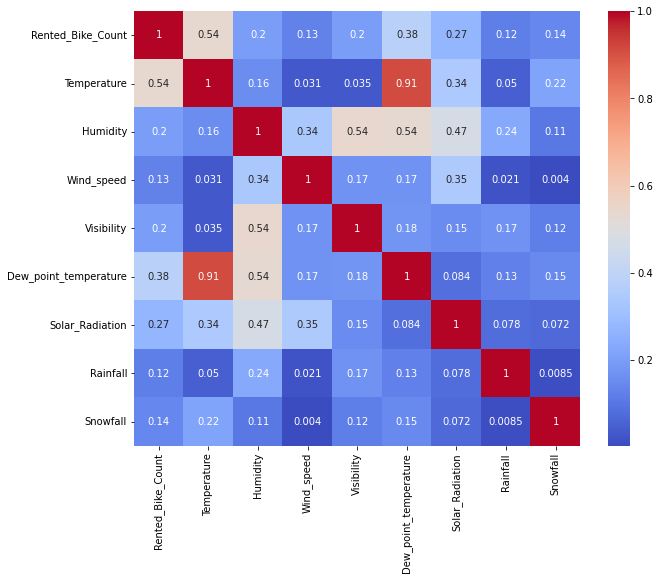

In [46]:
# now seeing this corr graphically with help of hitmap 

plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True )

From this heatmap, we can observe multicolinearity in our data. 
For example between temperature and dew point temperature. we need to solve this problem

Dropping one of tempearture and dew point temperature is very good option to deal with multicollinearity. 

As tempeature is good to catch trend of bike count than dew point temperature. 

In [47]:
# dropping dew point column
df.drop(['Dew_point_temperature'] , axis = 1 , inplace = True)

**One hot encoding to convert categorical into numerical columns for better alaysis**


In [48]:
df_enc = df.copy()

def one_hot_encoding(data , column ) :
  data = pd.concat([data , pd.get_dummies(data[column] , prefix = column , drop_first = True)] , axis = 1)
  data = data.drop([column], axis =1 )
  return data

for col in categorical_df :
  df_enc = one_hot_encoding(df_enc , col )
df_enc.head()


,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekend_col_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
# multicolinearity with te help of vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
# now calling vif our feature columns 
calc_vif(df_enc[[i for i in df_enc.describe().columns if i not in ['Rented_Bike_Count',]]] )

,variables,VIF
0,Temperature,13.753229
1,Humidity,19.281318
2,Wind_speed,5.654183
3,Visibility,9.011591
4,Solar_Radiation,7.827087
5,Rainfall,1.117934
6,Snowfall,1.168799
7,Hour_1,1.860490
8,Hour_2,1.861176
9,Hour_3,1.861812


**Separating independent (X) and dependant column (Y).**

In [51]:
# now we will seprate our datasets in indepent and dependent columns 
X = df_enc.drop(columns = ['Rented_Bike_Count'] , axis  = 1)
Y = np.sqrt(df_enc['Rented_Bike_Count'])

In [52]:
X.shape

(8760, 47)

In [53]:
Y.shape

(8760,)

In [54]:
# now applying test train split
from sklearn.model_selection import train_test_split 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1)
print(X_train.shape)
print(X_test.shape)


(7008, 47)
(1752, 47)


In [55]:
df_enc.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September',
       'weekend_col_Weekend'],
      dtype='object')